# INTRO

Antes de comenzar, quiero explicar un poco el concepto de  "Clases". Si no saben de lo que estoy hablando (o tienen una idea muy muy vaga del tema), no se preocupen porque la idea es empezar viendo una breve introducción de este concepto.

Les recomiendo amigarse con las "Clases" ya que, no sólo son una muy buena herramienta de la programación orientada a objetos (por eso existen en Python justamente) que les va a servir a uds para programar, sino que se las van a cruzar mucho en otras materias.

La programación orientada a objetos (POO) es un paradigma de programación que se basa en la creación de objetos que contienen datos y métodos (funciones) que operan sobre esos datos. Los **objetos** son instancias de una **clase**, que es una plantilla o molde que define las propiedades y comportamientos comunes a un conjunto de objetos. Cada objeto creado a partir de una clase tiene su propia identidad, estado y comportamiento. Los objetos interactúan entre sí a través de mensajes, que son llamadas a los **métodos** de otros objetos. Esta interacción entre objetos permite construir programas más complejos y modulares, en los que cada objeto es responsable de su propia funcionalidad y los cambios en el estado de un objeto no afectan directamente a los demás objetos del sistema.

Las Clases nos permiten empaquetar datos y asignarle funcionalidad propia. Crear una clase en python es crear un nuevo tipo de objeto con instancias propias. Cada instancia de clase puede tener **atributos** para mantener su estado como también pueden tener **métodos** para modificar su estado.

In [7]:
class MiPrimerClase:
    a = 1 #atributo

    def funcion(self): #método
        return '¡Hola Mundo!'

In [8]:
cl = MiPrimerClase()
cl

In [9]:
print(cl.a)
print(cl.funcion())

1
¡Hola Mundo!


Ahora veamos un ejemplo con "más sentido":

In [10]:
class Football_Team:
  num_players = 11
  def __init__(self, name, colors):
    self.name = name
    self.colors = colors

  def sing(self):
      print(f'{self.name} mi buen amigo, esta campaña volveremo a estar contigo.\nTe alentareeemos, de corazooon.\nEsta es tu hinchada que te quiere ver campeón (...)')

Este método `__init__()` permite crear objetos con atributos en un estado inicial particular.

In [11]:
bokita = Football_Team('Boca', ['azul', 'amarillo'])
pincha = Football_Team('Estudiantes', ['rojo', 'blanco'])

In [12]:
bokita

Luego la llamada a sus atributos y métodos es la misma que vista anteriormente.

In [13]:
pincha.num_players

11

In [14]:
bokita.num_players

11

In [15]:
bokita.colors

['azul', 'amarillo']

In [16]:
pincha.colors

['rojo', 'blanco']

In [17]:
pincha.colors = ['blanco', 'rojo']

In [18]:
pincha.colors

['blanco', 'rojo']

In [19]:
bokita.sing()

Boca mi buen amigo, esta campaña volveremo a estar contigo.
Te alentareeemos, de corazooon.
Esta es tu hinchada que te quiere ver campeón (...)


In [20]:
pincha.sing()

Estudiantes mi buen amigo, esta campaña volveremo a estar contigo.
Te alentareeemos, de corazooon.
Esta es tu hinchada que te quiere ver campeón (...)


_Bibliografía recomendada para aprender más sobre Clases y Métodos:_

*   [Classes by python.org](https://docs.python.org/es/3/tutorial/classes.html)
*   [Python Classes by W3 Schools](https://www.w3schools.com/python/python_classes.asp)

Bueno, dicho esto ... ¡ahora sí comenzamos!

A veces sucede que `matplotlib` no está instalado correctamente y arroja un error del tipo "*Import*". Si les llega a suceder eso, deben correr las siguientes líneas de código.

*(Este error sucede debido a un error propio de la libería de matplotlib, por ende hay que desinstalar matplotlib y volverlo a cargar en una versión que sepamos que no se rompe)*



> IMPORTANTE: Les va a pedir por consola que completen si continuan (`y`) o no continuan (`n`) con la desinstalación. Así que ingresen la letra `y` para continuar con la desintalación correspondiente.

In [ ]:
"""
#desinstalamos la versión de matplotlib que hay por default en Colab
!python -m pip uninstall matplotlib

#instalamos una versión de matplotlib que nos sirva para continuar graficando
!pip install matplotlib==3.1.3

import matplotlib.pyplot as plt
"""

# ECG

Les dejo el siguiente link para que hagan un acceso directo en su Drive y así poder tener acceso fácilmente a los archivos que vamos a utilizar.



> [Link](https://drive.google.com/drive/folders/1i069Xsc3g4m68jIoM0EOWsJnyLTmbg0t?usp=sharing)



Importamos las librerías que vamos a utilizar:

In [22]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
import scipy.io
import scipy.interpolate
from scipy.fft import fft
import math as m

Cargamos las señales a utilizar y observamos qué hay allí adentro:

In [ ]:
data = scipy.io.loadmat('/content/drive/MyDrive/PSIB/Clase ECG - Señales/ecg2.mat')
data

In [ ]:
type(data)

In [ ]:
print(sorted(data.keys()))

Podemos ver dos señales muy claras: D2, Fs y qrs (¿qué creen que son? 🤔)

La respuesta los sorprenderá ...

In [ ]:
data['D2']

In [ ]:
D2 = data['D2'][:,0] # Derivación de ECG
D2

In [ ]:
data['Fs']

In [ ]:
Fs = data['Fs'][0][0] # Frecuencia de muestreo
Fs

In [ ]:
qrs = data['qrs'] # Marca de los QRS
qrs

Generamos las marcas del segmento PQ a partir de los qrs:

In [ ]:
Qon = np.array(qrs) - 25

In [ ]:
Qon

Graficamos la señal en cuestión:

In [ ]:
n = np.arange(0,(len(D2))/Fs,1/Fs) #creamos el vector tiempo
t = np.linspace(0,len(D2)/Fs, len(D2))

plt.figure(figsize=(30,5))
plt.plot(n[0:20*Fs],D2[0:20*Fs])
plt.title('D2')
plt.ylabel('Amplitud ')
plt.xlabel('Tiempo [s]')
plt.show()

## Cubic Splines

Para aplicar el método de interpolación visto en clase llamado Cubic Splines, vamos a utilizar una función del modulo interpolate de la librería SciPy: [scipy.interpolate.CubicSpline()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html)

Para ver su accionar, agreguemos un ruido a la linea de base con forma sinusoidal.

In [ ]:
ecg = D2 + 10*np.sin(2*np.pi*0.1*n) # Agrego movimiento a la linea de base

plt.figure(figsize=(30,5))
plt.plot(n[0:20*Fs],ecg[0:20*Fs])
plt.title('D2')
plt.ylabel('Amplitud')
plt.xlabel('Tiempo')
plt.show()

A partir de la información de la marca de los qrs que ya nos proveía el archivo, podemos detectar dónde estan estos complejos.

In [ ]:
plt.figure(figsize=(30,5))
plt.plot(n, D2, 'b')
plt.plot(qrs/Fs,D2[qrs],'ro')
plt.title('Marcas + D2')
plt.ylabel('Amplitud')
plt.xlabel('Tiempo')
plt.show()

Y por ende también en la señal que le agregamos ruido (porque sólo afectamos a la amplitud de los datos, no afectamos nada temporal)

In [ ]:
plt.figure(figsize=(30,5))
plt.plot(n, ecg, 'b')
plt.plot(qrs/Fs,ecg[qrs],'ro')
plt.title('Marcas + D2')
plt.ylabel('Amplitud')
plt.xlabel('Tiempo')
plt.show()

Entonces ahora sí, con esta información podemos utilizar esta función y así estimar por este método de interpolación el ruido:

In [ ]:
cs = scipy.interpolate.CubicSpline(qrs[:,0]/Fs, ecg[qrs])
cs

In [ ]:
# Cubic splines
cs = scipy.interpolate.CubicSpline(qrs[:,0]/Fs, ecg[qrs])
ecg_cs = cs(n)


plt.figure(figsize=(30,5))
plt.plot(n,ecg_cs, linewidth=5)
plt.plot(n, ecg)
plt.title('Cubic Spline')
plt.ylabel('Amplitud')
plt.xlabel('Tiempo')
plt.show()

Veamos esto en la línea de base de la señal:

In [ ]:
# Cubic splines
cs = scipy.interpolate.CubicSpline(Qon[:,0]/Fs, ecg[Qon])
ecg_cs = cs(n)


plt.figure(figsize=(30,5))
plt.plot(n,ecg_cs, linewidth=5)
plt.plot(n, ecg)
plt.title('Cubic Spline')
plt.ylabel('Amplitud')
plt.xlabel('Tiempo')
plt.show()

Podemos ver que las señales generadas tienen distintas dimensiones por ende redefinimos la variable `ecg_cs` para que quede con la misma dimensión que la variable `ecg`:

In [ ]:
print(ecg_cs.shape)
print(ecg.shape)
ecg_cs = ecg_cs[:,0] # le bajamos la dimensión extra
print(ecg_cs.shape)

Ahora sí podemos eliminar este ruido de base sinusoidal a partir de su estimación por Cubic Splines

In [ ]:
y = ecg - ecg_cs # me quedo con el ecg sin la sinusoide estimada por Cubic Splines
plt.figure(figsize=(30,5))
plt.plot(n[0:10*Fs],y[0:10*Fs], label = 'Estimada por Cubic Splines')
plt.plot(n[0:10*Fs],D2[0:10*Fs], label = 'Original')
plt.title('Cubic Spline')
plt.ylabel('Amplitud')
plt.xlabel('Tiempo')
plt.legend()
plt.show()

## EJERCITACIÓN

### Ejercicio

A partir de la señal en el link llamada *ecg1.mat* eliminar el ruido que se puede ver en cada canal (chequear anteriormente su espectro y la existencia de este ruido). ¿Qué tipo de ruido creen que es?

### Recomendación

Les va a ser de mucha utilidad para el TP1 hacer el código del algoritmo de Pam y Tompkins para poder hacer detección de complejos QRS de manera offline.

In [ ]:
# Paso 1: Filtrado de la señal

# Paso 2: Filtro derivativo

# Paso 3: Elevamos al cuadrado

# Paso 4: Filtro integrador

# HRV

Tienen acceso al siguiente link para poder tener acceso fácilmente a los  archivos que vamos a utilizar en esta sección.

> [Link](https://drive.google.com/drive/folders/1gF3cQ381MjwGGSFduQXQb2T2cbscuXtj?usp=sharing)

In [ ]:
! pip install wfdb
# https://github.com/MIT-LCP/wfdb-python
# https://wfdb.readthedocs.io/en/latest/

!pip install pyhrv
# https://pypi.org/project/pyhrv/

In [ ]:
import numpy as np
import scipy.signal
import scipy.io
import scipy.interpolate
from scipy.fft import fft
import math as m

import wfdb
import pyhrv

Observen que hay dos librerías en específico que vamos a tener que instalar (`!pip install ...`):
* wfdb
* pyhrv

## [wfdb](https://wfdb.readthedocs.io/en/latest/index.html)

Antes de explicar sobre esta librería, es necesario contarles un poco acerca de [PhysioNet](https://physionet.org/).

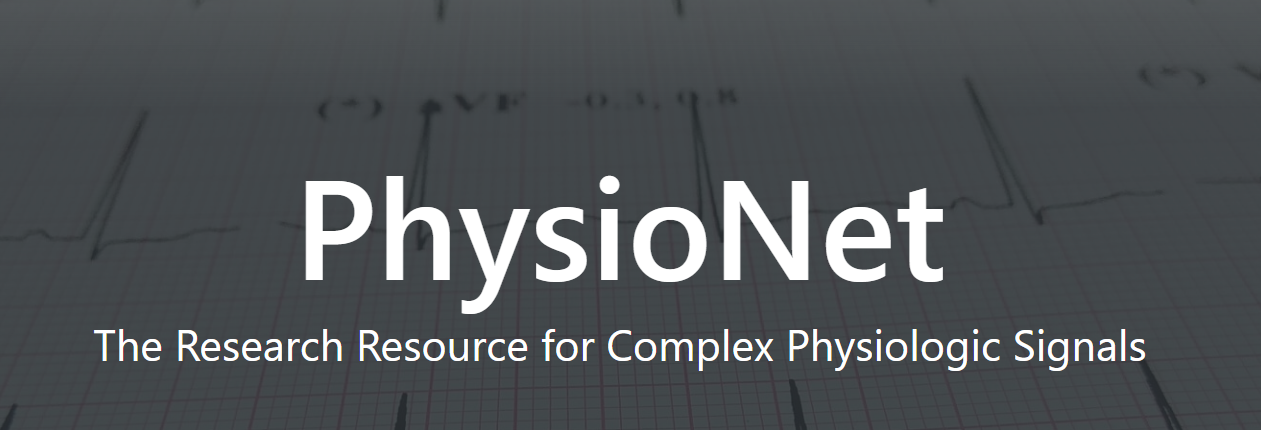


**PhysioNet** es un repositorio de datos de investigación médica de libre acceso administrado por el Laboratorio de Fisiología Computacional del MIT y cuenta con el apoyo del Instituto Nacional de Imágenes Biomédicas y Bioingeniería (NIBIB). Cuenta con un archivo enorme y en crecimiento de registros digitales bien caracterizadss de señales fisiológicas y datos relacionados para uso de la comunidad de investigación biomédica. Incluye bases de datos de señales multiparamétricas cardiopulmonares, neurales y biomédicas de sujetos sanos y pacientes con una variedad de afecciones con implicaciones importantes para la salud pública, que incluyen muerte cardíaca súbita, insuficiencia cardíaca congestiva, epilepsia, trastornos de la marcha, apnea del sueño y envejecimiento.

En otras palabras, cuando necesiten una base datos de señales o imágenes médicas, pueden encontrarlo en PhysioNet ya que allí van a poder ver muchísimos datos con sus respectivos artículos academícos en los que fueron publicados.

Para utilizar los datos de PhysioNet, se requiere un software especializado. Los mismos desarrolladores de PhysioNet, anteriormente llamada PhysioBank, desarrollaron una gran colección de este tipo de software durante los últimos 20 años, y gran parte de él está contenido en el paquete de software **WFDB (WaveForm DataBase)**, el sucesor con licencia GPL del paquete de software MIT DB.

Los principales componentes del paquete de software WFDB son la **biblioteca WFDB** (con aproximadamente 75 aplicaciones WFDB para procesamiento de señales y análisis automatizado) y el **software WAVE** para visualización, anotación y análisis interactivo de datos de forma de onda. El paquete también incluye una colección completa de documentación , incluidos tutoriales y manuales de referencia.

El paquete completo está escrito en C y se puede usar en todas las plataformas populares, incluidas GNU/Linux, MacOS X, MS-Windows y todas las versiones de Unix.

En Python, existe la librería `wfdb` que está compuesta de herramientas para leer, escribir y procesar señales y anotaciones del tipo WFDB.

Los componentes principales de este paquete se basan en las especificaciones originales de WFDB. Este paquete no contiene exactamente la misma funcionalidad que el paquete WFDB original. Su principal objetivo fue poder implementar tantas de sus funciones principales como sea posible, con API fáciles de usar. Con el tiempo, se fueron agregando herramientas adicionales útiles de procesamiento de señales fisiológicas.

Nosotros, vamos a utilizar varias funciones dentro de este paquete. Pueden chusmear la librería completa [aquí](https://wfdb.readthedocs.io/en/stable/).

Los archivos que les comenté al principio de este documento que vamos a utilizar, son señales de PhysioNet (en específico de wfdb) que vamos a poder leer y manipular con esta librería.

En la siguiente línea de código podemos ver cómo leer uno de estos archivos:

In [ ]:
N = 20000 # cantidad de puntos a leer
path = '/content/drive/MyDrive/PSIB/Clase HRV - Señales/100' # CAMBIAR según el path suyo
signal, fields = wfdb.rdsamp(path,1,N)

En la variable que cargamos con el nombre `signal` cargamos a la señal de interés.

In [ ]:
signal

En la variable que cargamos con el nombre `fields`, podemos ver datos específicos del archivo (frecuencia de muestreo, unidades, nombre de derivaciones o canales, etc).

In [ ]:
fields # observen que es un diccionario

Para acceder a los valores dentro de esta variable, podemos leerlos como en cualquier diccionario.

In [ ]:
fs = fields['fs']
print(fs)

Como pudimos ver en el diccionario `fields`, cargamos en la variable `signal` dos señales: MLII y V5.

In [ ]:
signal.shape

Por eso nos vamos a quedar con una sola de ellas para continuar.

In [ ]:
x = signal[:,1]
print(x)

A continuación realicemos el vector tiempo para poder graficar esta señal y ver qué hay dentro.

In [ ]:
L = len(x)
t = np.linspace(0,L/fs,L)

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(t,x)
plt.title('Señal cargada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [mV]')
#plt.xlim([0,25])
plt.show()

Podemos observar que claramente es una derivación de un electrocardiograma.

Las señales de wfdb vienen con anotaciones dentro de una clase llamada `Annotation`. Estas anotaciones fueron tomadas por los expertos que hicieron el registro y podemos encontrarlas dentro de cada señal.

Si desean conocer más sobre la clase Annotation de wfdb pueden verlo en este mismo colab con el comando `help()`

In [ ]:
help(wfdb.Annotation)

Entonces para acceder a las anotaciones deben correr el siguiente código:

In [ ]:
ann  = wfdb.rdann(path,'atr',1,N)
print(ann)

Observen que la variable `ann` es un tipo de objeto (clase) específico de wfdb así que para acceder a sus datos deben ir a su método correspondiente.

Para conocer todos los métodos dentro de wfdb pueden correr el siguiente comando.

In [ ]:
print(dir(wfdb))

In [ ]:
dir(np)

En este caso para ver las anotaciones, debemos acceder al método `symbol` de la clase `ann` anteriormente creada.

In [ ]:
ann

In [ ]:
simbolos = ann.symbol
simbolos

In [ ]:
len(simbolos)

Observen que ahora la variable `simbolos` es una lista con 70 anotaciones creadas del tipo: `+`, `N` y `A`

Si van a la celda que corrieron el comando `help(wfdb.Annotation)` pueden observar qué significa cada símbolo:



*   "**N**" = 'Normal beat'
*   "**A**" = 'Atrial premature contraction'
*   "**+**" = 'Rhythm change'



Por otro lado, accedamos al método `sample` de la clase `ann`

In [ ]:
samples = ann.sample
samples

In [ ]:
len(samples)

Aquí detro podemos observar un arreglo con 70 puntos de datos relacionados a las ubicaciones (en muestras) de las anteriores anotaciones.

Por ende, procedemos a detectar la ubicación de estos latidos anormales registrados en las anotaciones

In [ ]:
anormales = [i!='N' for i in simbolos]
# si no entienden esto repasen listas por comprensión que lo vimos en la primer clase práctica
anormales

Creamos un vector entonces donde dice si hay (`True`) o no (`False`) latidos anormales, es decir, donde hubo una anotación que no sea una "N".

A continuación detectamos las posiciones (en muestras) de estos latidos anormales

In [ ]:
posicion_anormales = [i for i,j in zip(samples,anormales) if j]
posicion_anormales

Volcamos esta información en un gráfico adecuado:

In [ ]:
plt.figure(figsize=(25,5))
plt.plot(t,x,'y')
plt.plot(t[posicion_anormales], x[posicion_anormales],'bo')
plt.title('Anormales detectados')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [mV]')
plt.show()

Me parece interesante (y útil) que conozcan otras funciones dentro de esta librería; en específico en el módulo processing.

In [ ]:
from wfdb import processing # importamos el módulo

Aprendamos más acerca sobre la función `find_peaks()` con el siguiente comando:

In [ ]:
help(processing.find_peaks)

Utilizamos entonces esta función para detectar picos en la señal.

In [ ]:
picos = processing.find_peaks(x)

plt.figure(figsize=(25,5))
plt.plot(t,x,'y')
plt.plot(t[picos[0]], x[picos[0]],'go', label='hard_peaks')
plt.plot(t[picos[1]], x[picos[1]],'bo', label='soft_peaks')
plt.title('Picos detectados')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [mV]')
plt.legend()
plt.show()

Les dejo a su criterio una posible "utilidad" de esta función 😉

Otra función interesante es `xqrs_detect()`:

In [ ]:
help(processing.xqrs_detect)

Utilizamos entonces esta función para detectar los índices en donde están los complejos QRS.

In [ ]:
qrs_inds = processing.xqrs_detect(x, fs)


plt.figure(figsize=(25,5))
plt.plot(x, 'y')
plt.stem(qrs_inds, x[qrs_inds], 'b')
plt.title('Complejo QRS detectado')
plt.xlabel('Muestras')
plt.ylabel('Amplitud [mV]')
plt.show()

Antes de continuar observemos que la posición de los qrs detectados y de los latidos anormales están desfasadas en muestras:

In [ ]:
print(qrs_inds)
print(posicion_anormales)

La primer anotación no la tenemos en cuenta y la segunda (en 2044) podemos ver que el qrs más cercano detectado es en la posición 2040. Por ende consideramos esto para continuar con lo siguiente que vamos a hacer: detectar los intervalos RR a partir de esta información.

In [ ]:
# Eliminamos los latidos anormales
qrs_limpio = [i for i, j in zip(qrs_inds, posicion_anormales*int(len(qrs_inds)/len(posicion_anormales))) if i+4 != j]

# Creamos el vector RR
RR = [j-i for i,j in zip(qrs_inds[0:-2], qrs_inds[1:-1])]

# Graficamos
plt.figure(figsize=(25,5))
plt.plot(t,x,'y')
plt.plot(t[posicion_anormales], x[posicion_anormales],'bo')
plt.title('Latidos anormales detectados')

plt.figure(figsize=(25,5))
plt.stem(RR)
plt.title('RR')

plt.show()

## [pyHRV](https://pyhrv.readthedocs.io/en/latest/_pages/api.html)

pyHRV es una caja de herramientas de Python de código abierto que calcula los parámetros de variabilidad de la frecuencia cardíaca (HRV) de última generación a partir de electrocardiografía (ECG), SpO2, pulso de volumen sanguíneo (BVP) u otras señales con indicadores de frecuencia cardíaca.

El principal objetivo de la librería es proporcionar una caja de herramientas de Python fácil de utilizar y versátil para la educación, la investigación y el desarrollo de aplicaciones dedicadas a HRV.

Proporciona un código fuente comprensible para ayudar a programadores principiantes a comprender los fundamentos del cálculo de parámetros de HRV, al tiempo que proporciona las funcionalidades de análisis de HRV más importantes para los desarrolladores y gráficos de calidad de publicación de los resultados para los investigadores.

Recomendamos en la materia leer con detalle y cuidado cada función que utilicen de cada librería. En específico les repetimos esto para pyHRV porque en cursos anteriores utilizaron funciones sin terminar de entender qué hacía ni cómo y por ende resolviendo incorrectamente ejercicios.

In [ ]:
qrs_limpio = np.array(qrs_limpio) # convertimos en numpy array
qrs_limpio_seg = qrs_limpio/fs  # convertimos en segundos los datos que estaban en muestras

Vamos a utilizar la función `nn_intervals` del módulo `tools` que calcula los intervalos NN entre picos R sucesivos.

In [ ]:
help(pyhrv.tools.nn_intervals)

In [ ]:
nni = pyhrv.tools.nn_intervals(qrs_limpio_seg)

plt.figure(figsize=(25,5))
plt.plot(t,x,'y')
plt.plot(t[posicion_anormales], x[posicion_anormales],'bo')
plt.title('Latidos anormales detectados')

plt.figure(figsize=(25,5))
plt.stem(nni)
plt.title('RR')

plt.show()

#### Tacograma

Si recuerdan de clase lo qué es un Tacograma, con esta librería podemos crearlo.

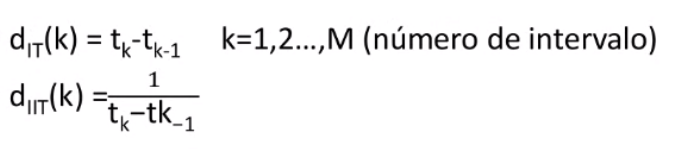

In [ ]:
pyhrv.tools.tachogram(RR,x, rpeaks = qrs_inds ,sampling_rate=fs, hr = False)

#### **Periodograma de Lomb**

Recordamos de clase:

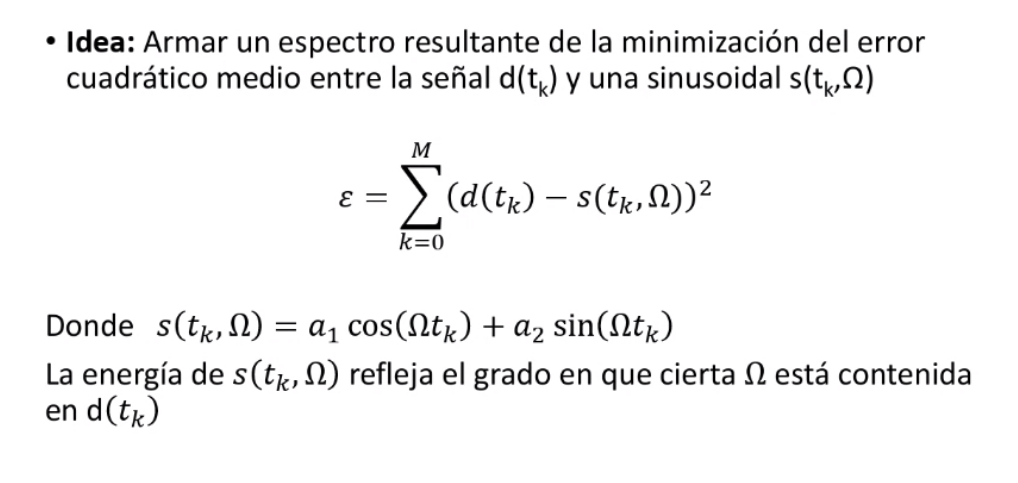

Con el siguiente comando podemos entonces graficar el periodogramada de Lomb de esta señal:

In [ ]:
pyhrv.frequency_domain.lomb_psd(RR, qrs_limpio)

Les propongo leer en detalle esta función ([link](https://pyhrv.readthedocs.io/en/latest/_pages/api/frequency.html)) para entender los parámetros y datos que arroja y cómo poder correrla correctamente.